In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

from scipy.spatial.distance import euclidean

In [2]:
df = pd.read_csv('apple_2023_masked.csv')

In [3]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,3day,4day,5day
0,2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,124.048042,124.048042,124.048042
1,2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,125.327515,125.327515,125.327515
2,2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,123.998451,123.998451,123.998451
3,2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,128.560867,128.560867,128.560867
4,2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,129.086517,129.086517,129.086517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385,193.091385,193.091385,193.091385
246,2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816,192.542816,192.542816,192.542816
247,2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548,192.642548,192.642548,192.642548
248,2023-12-28 00:00:00-05:00,193.629953,194.148591,192.662500,193.071426,34049900,0.0,0.0,193.071426,193.071426,193.071426,193.071426,193.071426


Modify the date into numerical features.

In [4]:

df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'], utc=True)

df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Day_of_Month'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Day_of_Year'] = df['Date'].dt.dayofyear

In [5]:
df

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,3day,4day,5day,Day_of_Week,Day_of_Month,Month,Day_of_Year
0,0,2023-01-03 05:00:00+00:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,124.048042,124.048042,124.048042,1,3,1,3
1,1,2023-01-04 05:00:00+00:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,125.327515,125.327515,125.327515,2,4,1,4
2,2,2023-01-05 05:00:00+00:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,123.998451,123.998451,123.998451,3,5,1,5
3,3,2023-01-06 05:00:00+00:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,128.560867,128.560867,128.560867,4,6,1,6
4,4,2023-01-09 05:00:00+00:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,129.086517,129.086517,129.086517,0,9,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,2023-12-22 05:00:00+00:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385,193.091385,193.091385,193.091385,4,22,12,356
246,246,2023-12-26 05:00:00+00:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816,192.542816,192.542816,192.542816,1,26,12,360
247,247,2023-12-27 05:00:00+00:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548,192.642548,192.642548,192.642548,2,27,12,361
248,248,2023-12-28 05:00:00+00:00,193.629953,194.148591,192.662500,193.071426,34049900,0.0,0.0,193.071426,193.071426,193.071426,193.071426,193.071426,3,28,12,362


Possible metric (Dynamic Time Warping).

In [6]:
def dtw_distance(x, y):
    distance, _ = fastdtw(x.reshape(-1, 1), y.reshape(-1, 1), dist=euclidean)
    return distance

It is not applied in the following, since the Euclidean metric seems to be the best metric in our settings.

In [7]:
features = ['Open', 'Day_of_Year', 'Volume']

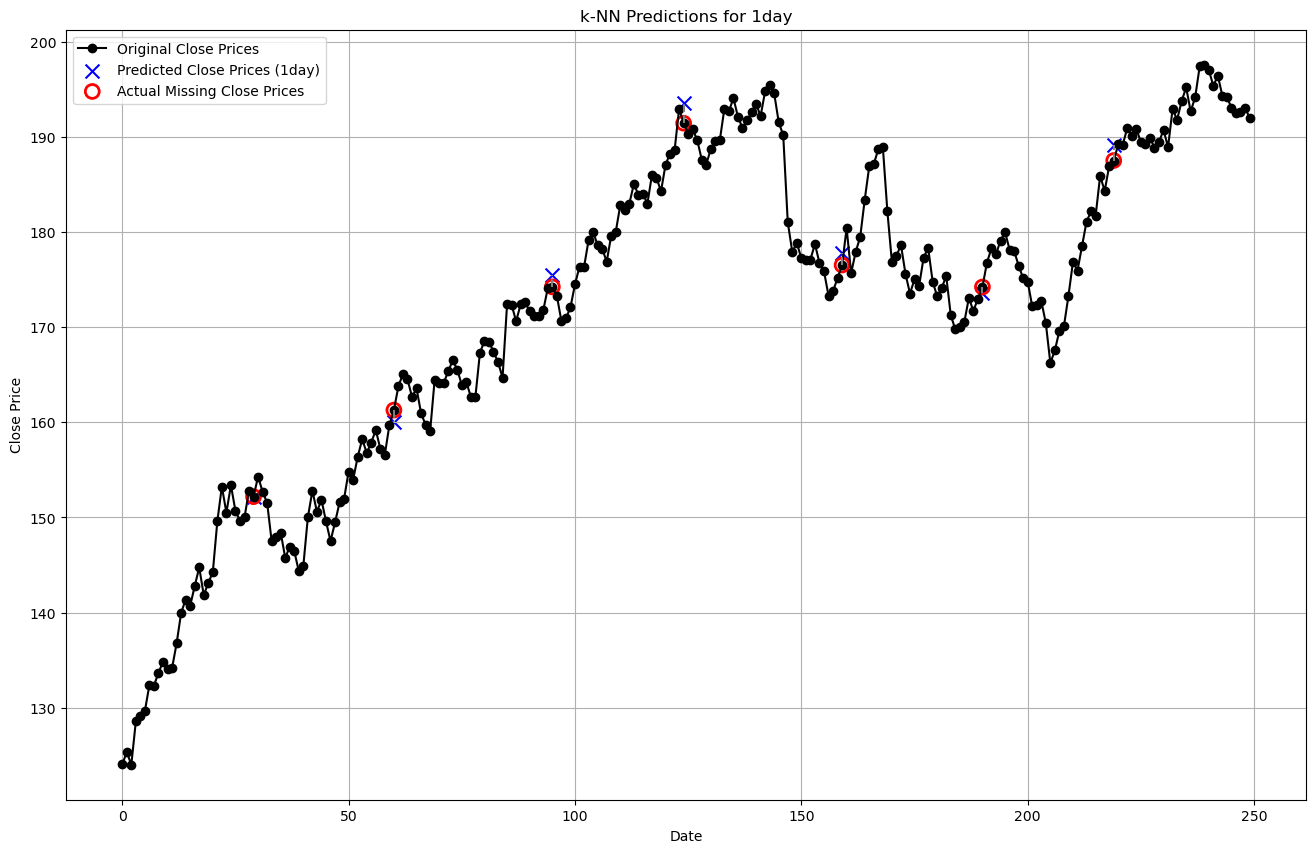

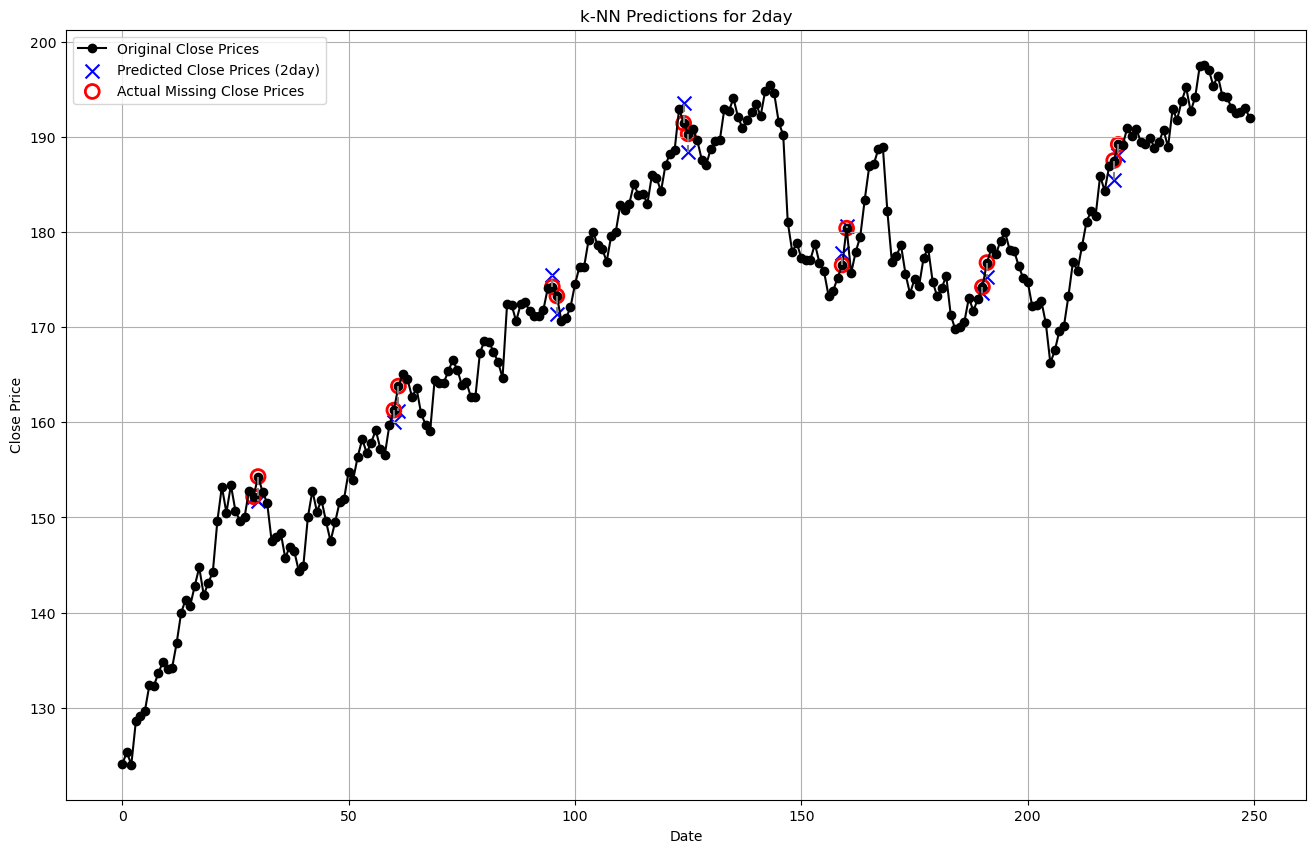

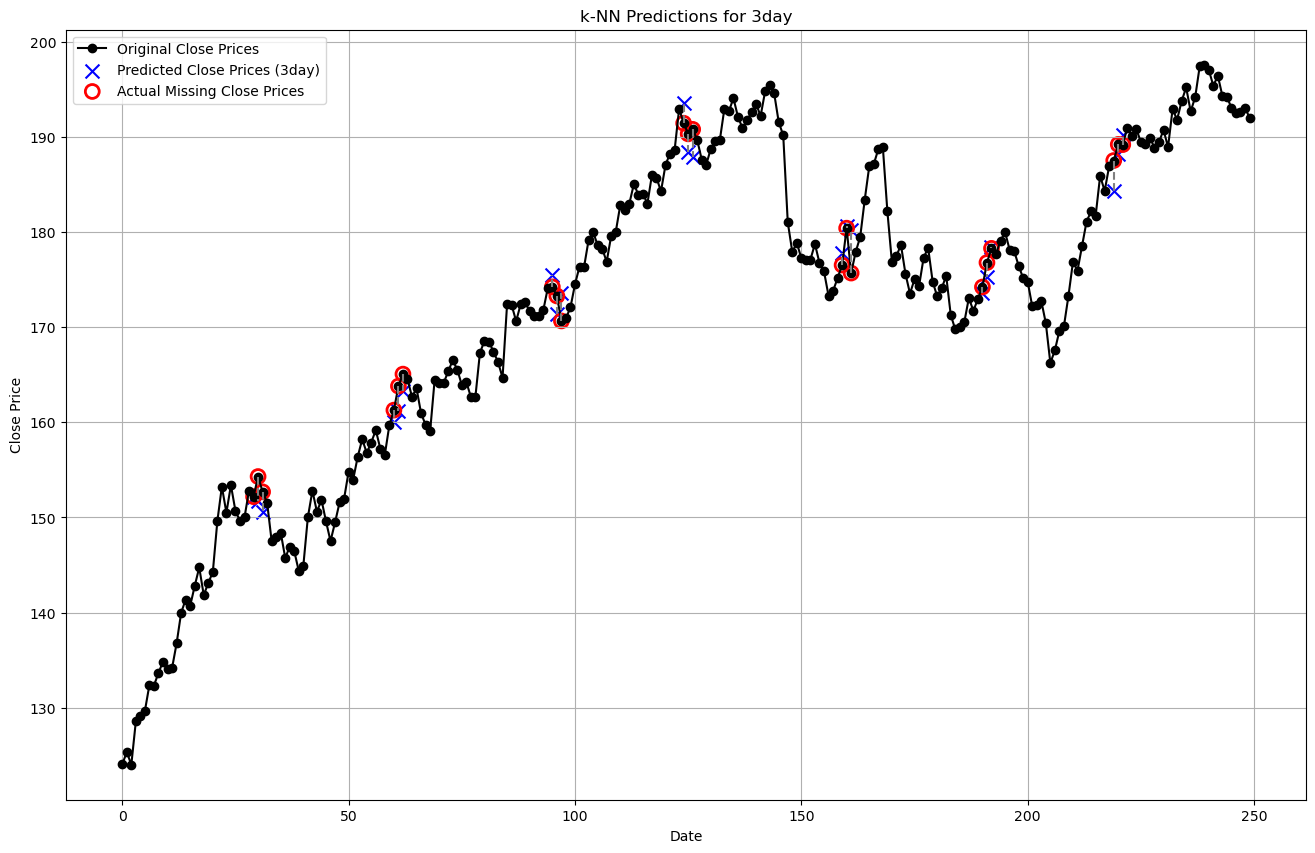

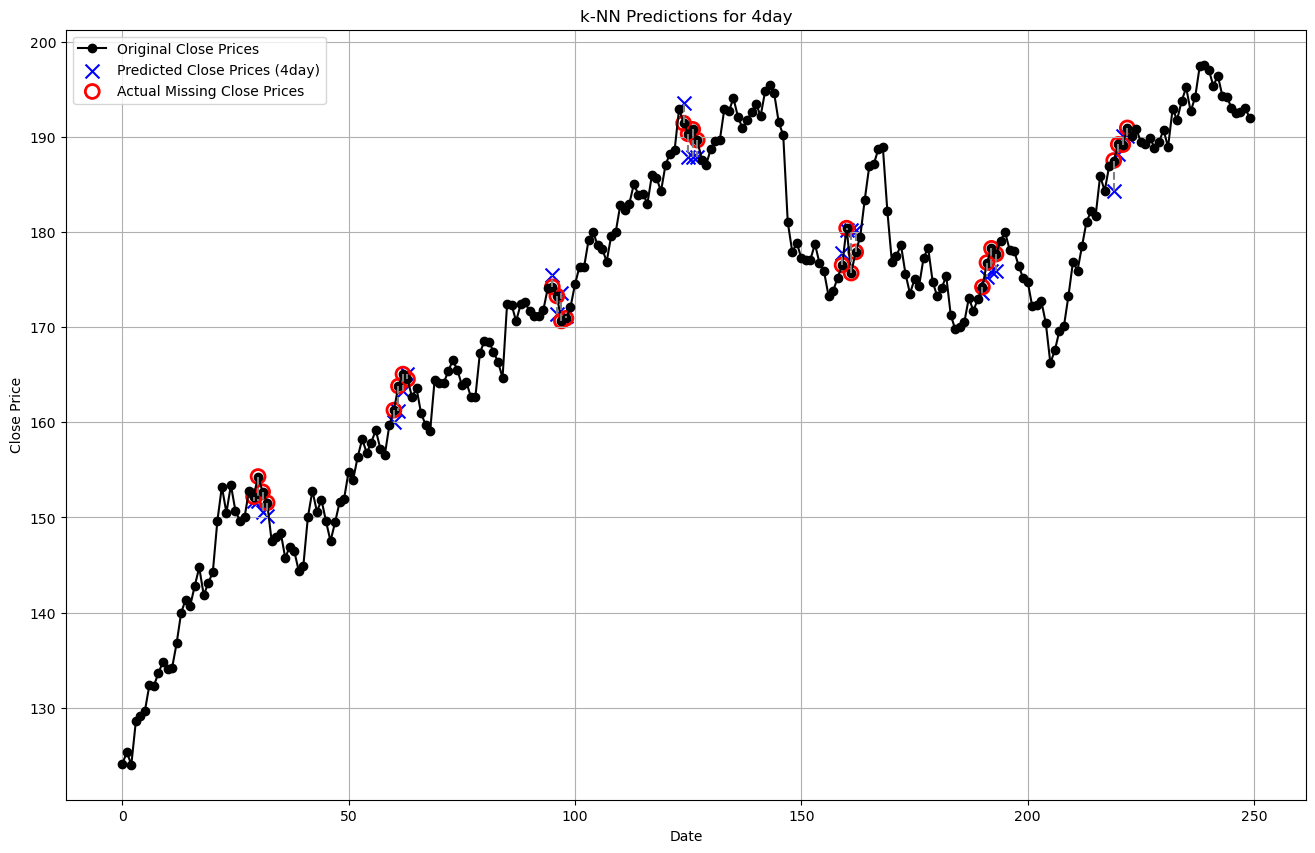

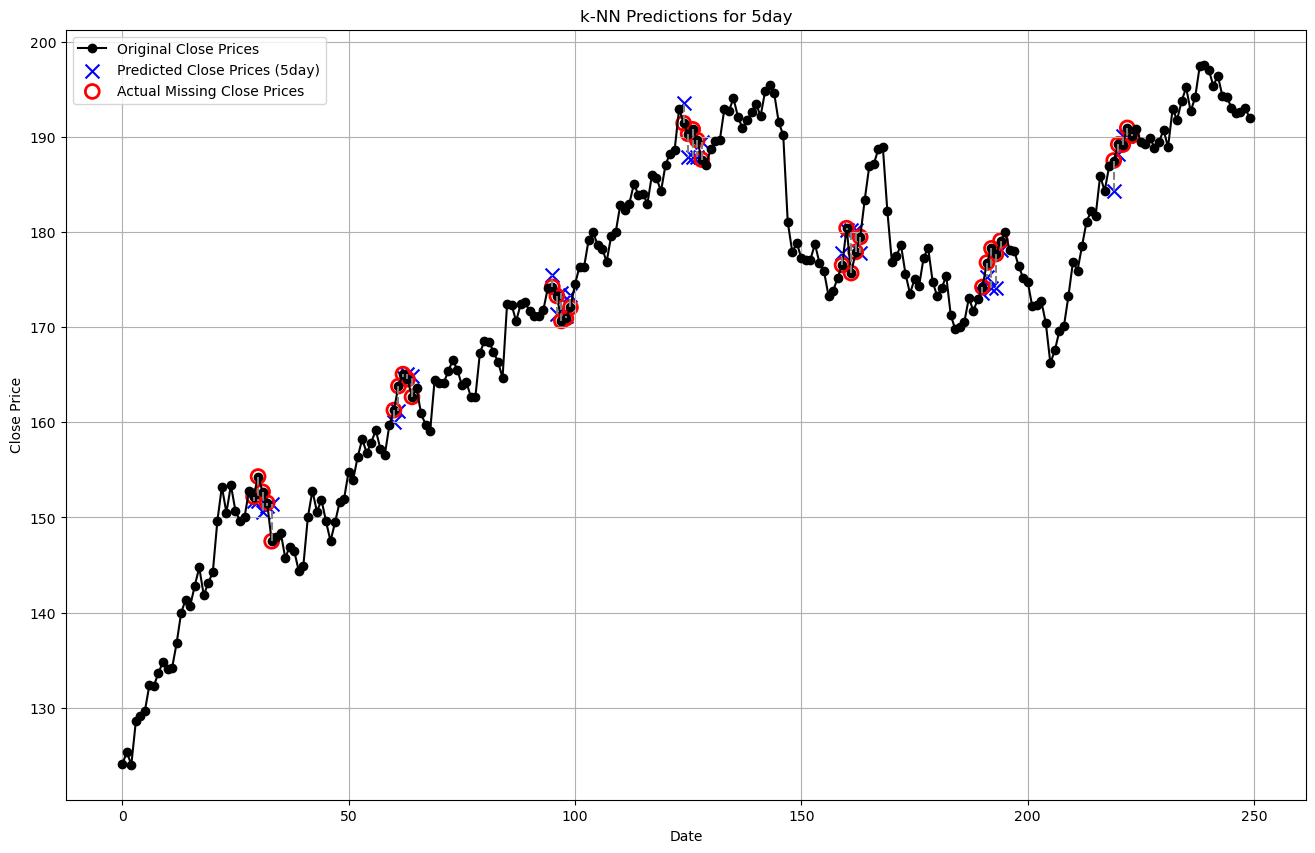

Mean Squared Errors (k-NN): [1.7802790995171829, 2.7589207485185043, 4.290671757081448, 4.031122796370508, 4.558172325362513]
Mean Squared Errors (Linear Interpolation): [0.679228361280242, 2.526317467717178, 1.8751985815220777, 3.3985990247556255, 3.4755440464642504]


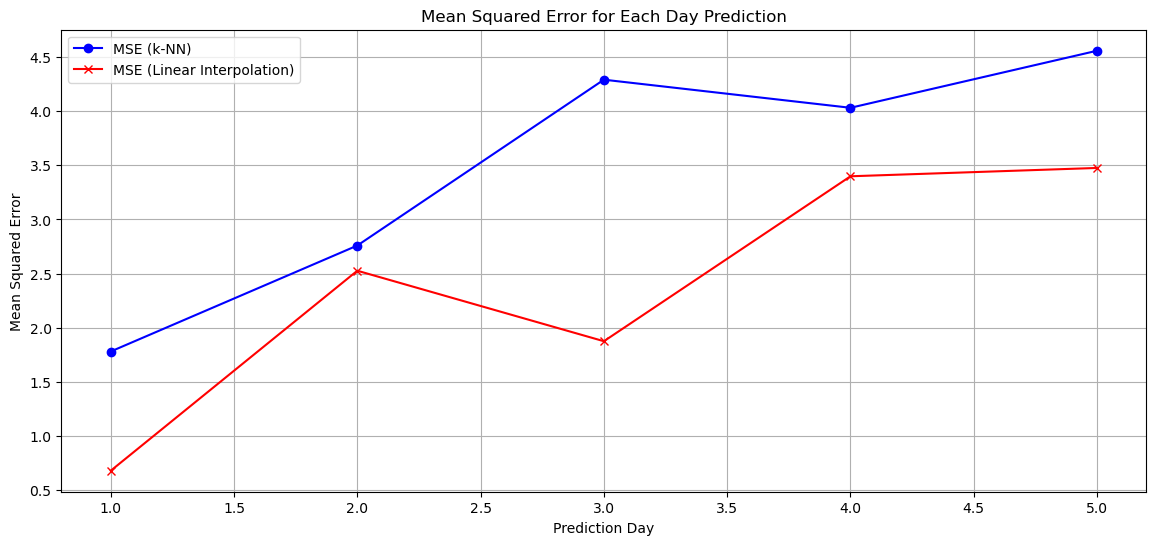

In [8]:
model = KNeighborsRegressor(n_neighbors=2, metric = 'manhattan')
scaler = StandardScaler()

predictions = {}
mse_values = []
mse_values_interp = []



for i in range(1, 6):
    plt.figure(figsize=(16, 10))  
    
    # Plot original close prices
    plt.plot(df.index, df['Close'], label='Original Close Prices', linestyle='-', marker='o', color='black')
    
    column_name = f'{i}day'
    df_non = df.dropna(subset=[column_name])
    missing_df = df[df[column_name].isna()]
    missing_index = df[df[column_name].isna()].index
    
    X = df_non[features]
    y = df_non[column_name]
    missing_X = missing_df[features]

    # Normalize the features
    X_scaled = scaler.fit_transform(X)
    missing_X_scaled = scaler.transform(missing_X)
    
    model.fit(X_scaled, y)
    predicted_close = model.predict(missing_X_scaled)
    predictions[i] = predicted_close

    mse = mean_squared_error(df.loc[missing_index, 'Close'], predicted_close[:len(missing_index)])
    mse_values.append(mse)
    mae = mean_absolute_error(df.loc[missing_index, 'Close'], predicted_close[:len(missing_index)])

    # Linear interpolation for comparison
    df_interp = df[column_name].interpolate()
    mse_interp = mean_squared_error(df.loc[missing_index, 'Close'], df_interp[missing_index])
    mse_values_interp.append(mse_interp)

    # Plot predicted close prices
    plt.scatter(missing_index, predictions[i], label=f'Predicted Close Prices ({i}day)', marker='x', s=100, color='blue')
    # Plot actual missing close prices
    plt.scatter(missing_index, df.loc[missing_index, 'Close'], label='Actual Missing Close Prices', marker='o', s=100, edgecolor='red', facecolor='none', linewidths=2)
    

    for idx in missing_index:
        plt.plot([idx, idx], [df.loc[idx, 'Close'], predictions[i][list(missing_index).index(idx)]], color='gray', linestyle='--')

    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'k-NN Predictions for {i}day')
    plt.legend()
    plt.grid(True)
    plt.show()

print('Mean Squared Errors (k-NN):', mse_values)

print('Mean Squared Errors (Linear Interpolation):', mse_values_interp)


# Plot MSE values
plt.figure(figsize=(14, 6))
plt.plot(range(1, 6), mse_values, marker='o', linestyle='-', color='blue', label='MSE (k-NN)')
plt.plot(range(1, 6), mse_values_interp, marker='x', linestyle='-', color='red', label='MSE (Linear Interpolation)')
plt.xlabel('Prediction Day')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Each Day Prediction')
plt.grid(True)
plt.legend()
plt.show()







